# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [40]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.014684
the average number of iterations is: 17.85


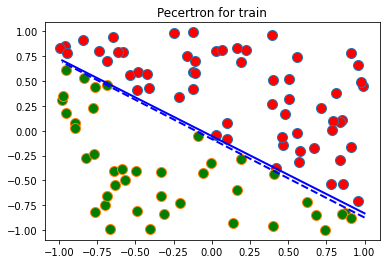

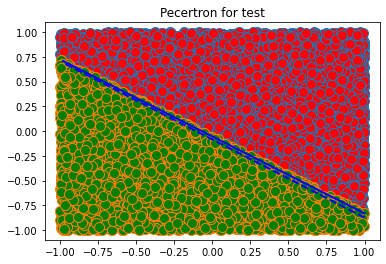

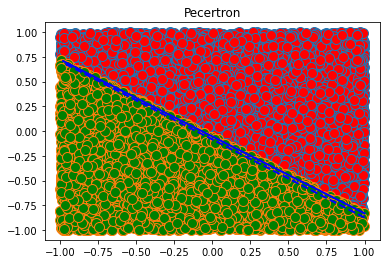

In [68]:
from perceptron import perceptron

nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
sum=0
E_train=E_test=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    X_train=X[:,0:nTrain]
    y_train=y[:,0:nTrain]
    X_test=X[:,nTrain:nTrain+nTest]
    y_test=y[:,nTrain:nTrain+nTest]
    
    w_g, iters = perceptron(X_train, y_train)
    # Compute training, testing error
    y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    y1=np.vstack((y1,y_train))
    y1=np.sum(y1,axis=0)
    
    y2=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    y2=np.vstack((y2,y_test))
    y2=np.sum(y2,axis=0)
    #print(X_train)
    #print(np.sum(y1==0)/nTrain,np.sum(y2==0)/nTest)
    E_train=np.sum(y1==0)+E_train
    E_test=np.sum(y2==0)+E_test
    
    #print(iters)
    sum=sum+iters
    
    # Sum up number of iterations
print('E_train is {}, E_test is {}'.format(E_train/(nRep*nTrain), E_test/(nRep*nTest)))
print('the average number of iterations is: {}'.format(sum/nRep))

# print('Average number of iterations is {}.'.format(avgIter))
plotdata(X_train, y_train, w_f, w_g, 'Pecertron for train')
plotdata(X_test,y_test,w_f,w_g,'Pecertron for test')
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.255, E_test is 0.247
the average number of iterations is: 1000.0


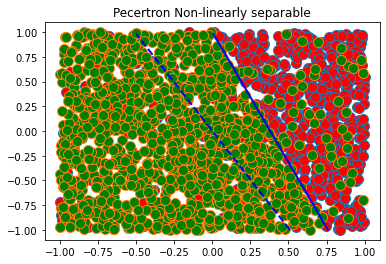

In [67]:



nRep = 1 # number of replicates
nTrain = 1000 # number of training data
nTest = 1000
sum=0
E_train=E_test=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest,'noisy')
    X_train=X[:,0:nTrain]
    y_train=y[:,0:nTrain]
    X_test=X[:,nTrain:nTrain+nTest]
    y_test=y[:,nTrain:nTrain+nTest]
    
    w_g, iters = perceptron(X_train, y_train)
    # Compute training, testing error
    y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    y1=np.vstack((y1,y_train))
    y1=np.sum(y1,axis=0)
    
    y2=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    y2=np.vstack((y2,y_test))
    y2=np.sum(y2,axis=0)
    #print(X_train)
    #print(np.sum(y1==0)/nTrain,np.sum(y2==0)/nTest)
    E_train=np.sum(y1==0)+E_train
    E_test=np.sum(y2==0)+E_test
    
    #print(iters)
    sum=sum+iters
    
    # Sum up number of iterations
print('E_train is {}, E_test is {}'.format(E_train/(nRep*nTrain), E_test/(nRep*nTest)))
print('the average number of iterations is: {}'.format(sum/nRep))

plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.04034, E_test is 0.05028


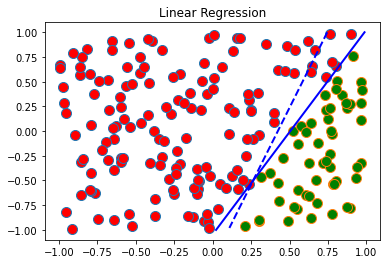

In [71]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest=100
E_train=E_test=0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    
    X_train=X[:,0:nTrain]
    y_train=y[:,0:nTrain]
    X_test=X[:,nTrain:nTrain+nTest]
    y_test=y[:,nTrain:nTrain+nTest]
    
    w_g = linear_regression(X_train, y_train)
    # Compute training, testing error
    y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    y1=np.vstack((y1,y_train))
    y1=np.sum(y1,axis=0)
    
    y2=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    y2=np.vstack((y2,y_test))
    y2=np.sum(y2,axis=0)
    
    E_train=np.sum(y1==0)+E_train
    E_test=np.sum(y2==0)+E_test
    
#print(E_test)
print('E_train is {}, E_test is {}'.format(E_train/(nRep*nTrain), E_test/(nRep*nTest)))


# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.13059, E_test is 0.12996


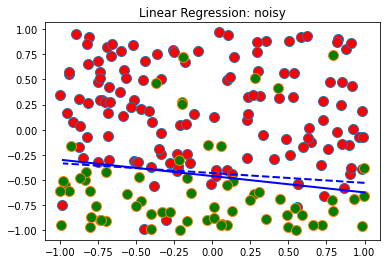

In [33]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest=100
E_train=E_test=0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    #print(X.shape[0])
    
    X_train=X[:,0:nTrain]
    y_train=y[:,0:nTrain]
    X_test=X[:,nTrain:nTrain+nTest]
    y_test=y[:,nTrain:nTrain+nTest]
    
    w_g = linear_regression(X, y);
    # Compute training, testing error
    y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    y1=np.vstack((y1,y_train))
    y1=np.sum(y1,axis=0)
    
    y2=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    y2=np.vstack((y2,y_test))
    y2=np.sum(y2,axis=0)
    
    E_train=np.sum(y1==0)+E_train
    E_test=np.sum(y2==0)+E_test
    
#print(E_test)
print('E_train is {}, E_test is {}'.format(E_train/(nRep*nTrain), E_test/(nRep*nTest)))

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

E_train is 0.49, E_test is 0.5496


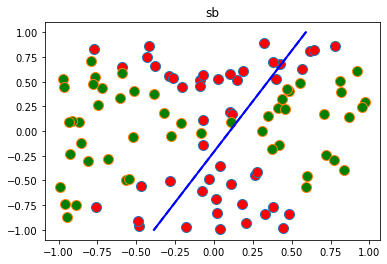

E_train is 0.05, E_test is 0.066
[[-0.06872399]
 [-0.02687646]
 [ 0.22464875]
 [ 0.13160111]
 [-1.84827196]
 [ 2.00418171]]


In [34]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
#print(X.shape[0])
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
y1=np.sign(np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X))))
#print(y1)
#print(y)
y1=np.vstack((y1,y))
y1=np.sum(y1,axis=0)
y2=np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
y2=np.vstack((y2,y_test))
y2=np.sum(y2,axis=0)
    
E_train=np.sum(y1==0)/X.shape[1]
E_test=np.sum(y2==0)/X_test.shape[1]


print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w, w,'sb')

# poly_fit with transform
x1x2=X[0,:]*X[1,:]
x12=X[0,:]*X[0,:]
x21=X[1,:]*X[1,:]
X_t = np.vstack((X,x1x2,x12,x21))  # CHANGE THIS LINE TO DO TRANSFORMATION
x1x2_t=X_test[0,:]*X_test[1,:]
x12_t=X_test[0,:]*X_test[0,:]
x21_t=X_test[1,:]*X_test[1,:]
X_test_t = np.vstack((X_test,x1x2_t,x12_t,x21_t))  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
y1=np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_t.shape[1])), X_t))))
y1=np.vstack((y1,y))
y1=np.sum(y1,axis=0)
y2=np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t))))
y2=np.vstack((y2,y_test))
y2=np.sum(y2,axis=0)

E_train=np.sum(y1==0)/X_t.shape[1]
E_test=np.sum(y2==0)/X_test_t.shape[1]


print('E_train is {}, E_test is {}'.format(E_train, E_test))
print(w)
#plotdata(X, y, w, w,'sb')

## Part6: Logistic Regression

E_train is 0.0055, E_test is 0.0128


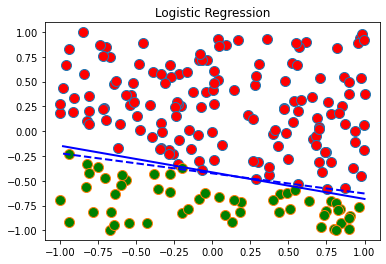

In [34]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest=100
E_train=E_test=0



for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    
    X_train=X[:,0:nTrain]
    y_train=y[:,0:nTrain]
    X_test=X[:,nTrain:nTrain+nTest]
    y_test=y[:,nTrain:nTrain+nTest]
    
    w_g = logistic(X_train, y_train);
    # Compute training, testing error
    y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    y1=np.vstack((y1,y_train))
    y1=np.sum(y1,axis=0)
    
    y2=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    y2=np.vstack((y2,y_test))
    y2=np.sum(y2,axis=0)
    
    E_train=np.sum(y1==0)+E_train
    E_test=np.sum(y2==0)+E_test


print('E_train is {}, E_test is {}'.format(E_train/(nTrain*nRep), E_test/(nTest*nRep)))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.1205, E_test is 0.1301


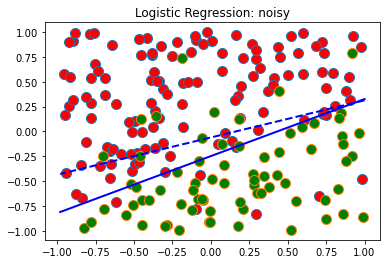

In [35]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest=100
E_train=E_test=0



for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest,'noisy')
    
    X_train=X[:,0:nTrain]
    y_train=y[:,0:nTrain]
    X_test=X[:,nTrain:nTrain+nTest]
    y_test=y[:,nTrain:nTrain+nTest]
    
    w_g = logistic(X_train, y_train);
    # Compute training, testing error
    y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    y1=np.vstack((y1,y_train))
    y1=np.sum(y1,axis=0)
    
    y2=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    y2=np.vstack((y2,y_test))
    y2=np.sum(y2,axis=0)
    
    E_train=np.sum(y1==0)+E_train
    E_test=np.sum(y2==0)+E_test

print('E_train is {}, E_test is {}'.format(E_train/(nTrain*nRep), E_test/(nTest*nRep)))
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.0352
Average number of support vectors is 3.53.


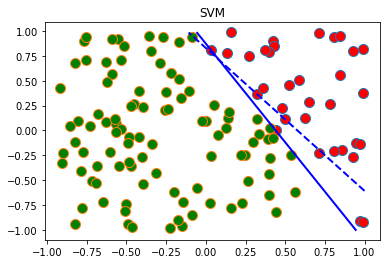

In [72]:
from svm import svm

nRep = 100; # number of replicates
nTrain = 30; # number of training data
nTest=100
E_train=E_test=0
avgNum=0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    X_train=X[:,0:nTrain]
    y_train=y[:,0:nTrain]
    X_test=X[:,nTrain:nTrain+nTest]
    y_test=y[:,nTrain:nTrain+nTest]
    w_g, num_sc = svm(X_train, y_train)
    # Compute training, testing error
    y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    y1=np.vstack((y1,y_train))
    y1=np.sum(y1,axis=0)
    
    y2=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    y2=np.vstack((y2,y_test))
    y2=np.sum(y2,axis=0)
    
    E_train=np.sum(y1==0)+E_train
    E_test=np.sum(y2==0)+E_test
    avgNum=avgNum+num_sc
    # Sum up number of support vectors

print('E_train is {}, E_test is {}'.format(E_train/(nRep*nTrain), E_test/(nRep*nTest)))
print('Average number of support vectors is {}.'.format(avgNum/nRep))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.